In [1]:
#ch14_NLP_LSTM_02.ipynb
#以Keras建立LSTM model，進行IMDb情緒分析

In [2]:
#=============================================================
#step 0. 資料預處理

In [3]:
#step 0.1 匯入所需模組
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [4]:
#step 0.2 讀取IMDb資料集目錄,以read_file() function, toolFuction.py
# import toolFuction
import toolFunction

In [5]:
#讀取訓練資料 'train'
y_train,train_text=toolFunction.read_files('train')

read train files: 25000


In [6]:
#讀取測試資料 'test'
y_test,test_text=toolFunction.read_files('test')

read test files: 25000


In [7]:
#step 0.3 建立 token 字典, num_words=3800 (將token字典由 2000-->3800)
token=Tokenizer(num_words=3800) #指定要建立3800字的token字典
token.fit_on_texts(train_text) #以token.fit_on_texts(), fit資料 "train_text" 

In [8]:
#step 0.4 將「影評文字」對應 token 字典,轉換成「數字list」
#         以 Tokenizer.texts_to_sequences() 
x_train_seq=token.texts_to_sequences(train_text) 
x_test_seq=token.texts_to_sequences(test_text)

In [9]:
#step 0.6 截長補短,將所有「數字list」裁成長度380 (100-->380)
#         以sequence.pad_sequences()
x_train=sequence.pad_sequences(x_train_seq,maxlen=380)
x_test=sequence.pad_sequences(x_test_seq,maxlen=380)

In [10]:
#=============================================================================
#step 1. 加入Embeding 層, Keras提供Embedding層可以將「數字list」轉換為「向量list」
#        關於詞向量

In [11]:
#step 1.1 匯入所需模組
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [12]:
#step 1.2 建立模型, 建立一個 Sequential model (線性堆疊模型)
#         後續, 我們將各NN層加入model
model=Sequential()

In [13]:
#step 1.3 將「Embedding」層加到 Sequential model
model.add(Embedding(output_dim=32,       #設定向量維度 32
                    input_dim=3800,      #token 字典, 字數3800
                    input_length=380))   #每個資料點(每筆資料都已裁成長度380)
model.add(Dropout(0.2))  #加入Dropout()層,避免overfitting

In [19]:
#==========================================================================
#step 2. 建立 LSTM model 

In [14]:
#step 2.1 將 「LSTM」層加入 model
model.add(LSTM(units=32)) #32個神經元

In [15]:
#step 2.2 將 「hidden」(隱藏層)加入 model, 使用 Dense()
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))  #加入Dropout()層,避免overfitting

In [16]:
#step 2.3 將「output」(輸出層)加入 model,使用 Dense(), 
model.add(Dense(units=1,
                activation='sigmoid')) #activation function--> sigmoid

In [17]:
#step 2.4 檢視模型摘要
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_________________________________________________________________


In [18]:
#====================================================================
#step 4. 訓練模型, 使用反向傳播演算法

In [19]:
#step 4.1 定義訓練方式, 使用 compile() method
model.compile(loss='binary_crossentropy', #設定損失函數為 cross_entropy
             optimizer='adam',            #設定優化方法 'adam'
             metrics=['accuracy'])        #評估模型方式是 accuracy 準確率

In [20]:
#step 4.2 開始訓練
train_history=model.fit(x_train,y_train,batch_size=100,
                        epochs=10,verbose=2,
                        validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 51s - loss: 0.4954 - acc: 0.7494 - val_loss: 0.7501 - val_acc: 0.6690
Epoch 2/10
 - 49s - loss: 0.2832 - acc: 0.8839 - val_loss: 0.3727 - val_acc: 0.8354
Epoch 3/10
 - 55s - loss: 0.2332 - acc: 0.9083 - val_loss: 0.4284 - val_acc: 0.8142
Epoch 4/10
 - 54s - loss: 0.2021 - acc: 0.9235 - val_loss: 0.3972 - val_acc: 0.8564
Epoch 5/10
 - 51s - loss: 0.1884 - acc: 0.9289 - val_loss: 0.4705 - val_acc: 0.8132
Epoch 6/10
 - 56s - loss: 0.1774 - acc: 0.9332 - val_loss: 0.4637 - val_acc: 0.8178
Epoch 7/10
 - 55s - loss: 0.1566 - acc: 0.9417 - val_loss: 0.6161 - val_acc: 0.8102
Epoch 8/10
 - 51s - loss: 0.1378 - acc: 0.9487 - val_loss: 0.6523 - val_acc: 0.8014
Epoch 9/10
 - 54s - loss: 0.1272 - acc: 0.9537 - val_loss: 0.6056 - val_acc: 0.7906
Epoch 10/10
 - 56s - loss: 0.1135 - acc: 0.9589 - val_loss: 0.7815 - val_acc: 0.7722


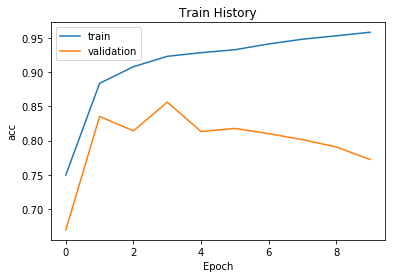

In [21]:
#step 4.3 畫出 accuracy 執行結果, 使用 show_train_history
%matplotlib inline
toolFunction.show_train_history(train_history,'acc','val_acc')

In [22]:
#評估模型準確率
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

25000/25000 [==============================] - 25s 985us/step


0.84660000000000002

In [28]:
#====================================================================================
#--> 0.846